In [137]:
import pandas as pd
import numpy as np

In [138]:
df= pd.read_csv("Data\HARGA RUMAH BADUNG RUMAH 123.csv")

In [139]:
df.columns

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA'], dtype='object')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.9+ KB


In [141]:
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,"28,000,000,000",1100,700,5,6,ADA,BADUNG
1,"19,000,000,000",824,800,4,4,ADA,BADUNG
2,"4,700,000,000",500,400,4,3,ADA,BADUNG
3,"4,900,000,000",251,300,5,4,ADA,BADUNG
4,"28,000,000,000",1340,575,4,5,ADA,BADUNG
...,...,...,...,...,...,...,...
996,"16,000,000,000",488,550,6,5,ADA,BADUNG
997,"4,500,000,000",209,270,4,4,ADA,BADUNG
998,"29,000,000,000",692,400,4,3,TIDAK ADA,BADUNG
999,"1,700,000,000",102,140,4,3,TIDAK ADA,BADUNG


In [142]:
df.loc[(df["GRS"]=="ADA"),["GRS"]]=1
df.loc[(df["GRS"]=="TIDAK ADA"),["GRS"]]=0

In [143]:
df.loc[(df["GRS"]==0),["GRS"]]

,GRS
8,0
9,0
29,0
66,0
80,0
...,...
984,0
992,0
998,0
999,0


In [144]:
df.describe()

,LT,LB,JKT,JKM
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,530.504496,487.275724,4.457542,3.940060
std,531.069773,452.872262,2.004606,1.903261
min,22.000000,38.000000,1.000000,1.000000
25%,220.000000,300.000000,4.000000,3.000000
50%,400.000000,411.000000,4.000000,4.000000
75%,677.000000,600.000000,5.000000,4.000000
max,6790.000000,10000.000000,27.000000,27.000000


jika diliat pada 
- LT bahwa memiliki nilai STD > MEAN yang mana berarti sebuah field memiliki nilai yang condong terhadap penyebaran data dari mean

- di field lainnya memiliki value yang STD < MEAN yang berarti sebuah field memilii niali yang condong terhadap penyebaran data dari mean



In [145]:
# evaluation the info about the df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.9+ KB


Thats data have analisis:

-> 3 data categorical 

-> Non missing value

In [146]:
# Cleaning data by per issue
backup = df.copy()

In [147]:
# convert GRS to numerical value
df["GRS"] = df["GRS"].astype(np.int64)

In [148]:
# convert to Harga to numerical value
df["HARGA"]= df["HARGA"].str.replace(',','').astype(np.longlong)

In [149]:
# Analisis the Kota filed
df['KOTA'].unique()
# only have one value

array(['BADUNG'], dtype=object)

In [150]:
# extracting the traing data
X = df[["LT","LB","JKT","JKM","GRS","KOTA"]]
y = df["HARGA"] 

In [151]:
# explain the extracting data
X

,LT,LB,JKT,JKM,GRS,KOTA
0,1100,700,5,6,1,BADUNG
1,824,800,4,4,1,BADUNG
2,500,400,4,3,1,BADUNG
3,251,300,5,4,1,BADUNG
4,1340,575,4,5,1,BADUNG
...,...,...,...,...,...,...
996,488,550,6,5,1,BADUNG
997,209,270,4,4,1,BADUNG
998,692,400,4,3,0,BADUNG
999,102,140,4,3,0,BADUNG


In [152]:
y

0       28000000000
1       19000000000
2        4700000000
3        4900000000
4       28000000000
           ...     
996     16000000000
997      4500000000
998     29000000000
999      1700000000
1000     1250000000
Name: HARGA, Length: 1001, dtype: int64

yg penting shapenya itu sama karena pada train yang mana data train x dengan train y harus punya bobot yang sama ataupun pada data testing

In [153]:
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,1,BADUNG
1,19000000000,824,800,4,4,1,BADUNG
2,4700000000,500,400,4,3,1,BADUNG
3,4900000000,251,300,5,4,1,BADUNG
4,28000000000,1340,575,4,5,1,BADUNG
...,...,...,...,...,...,...,...
996,16000000000,488,550,6,5,1,BADUNG
997,4500000000,209,270,4,4,1,BADUNG
998,29000000000,692,400,4,3,0,BADUNG
999,1700000000,102,140,4,3,0,BADUNG


# Cleaned Data

In [154]:
# convert the clan data to the csv
df.to_csv("Data/Cleaned_House_Data.csv",index=False)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   int64 
 6   KOTA    1001 non-null   object
dtypes: int64(6), object(1)
memory usage: 54.9+ KB


In [156]:
df.describe(include='all')

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001
unique,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,BADUNG
freq,NaN,NaN,NaN,NaN,NaN,NaN,1001
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060,0.778222,NaN
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261,0.415650,NaN
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000,0.000000,NaN
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000,1.000000,NaN
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000,1.000000,NaN
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000,1.000000,NaN


In [157]:
corelations=df.corr()
corelations["HARGA"].sort_values(ascending=False)

HARGA    1.000000
LT       0.740467
LB       0.651660
JKM      0.231875
JKT      0.217737
GRS      0.096788
Name: HARGA, dtype: float64

<AxesSubplot:>

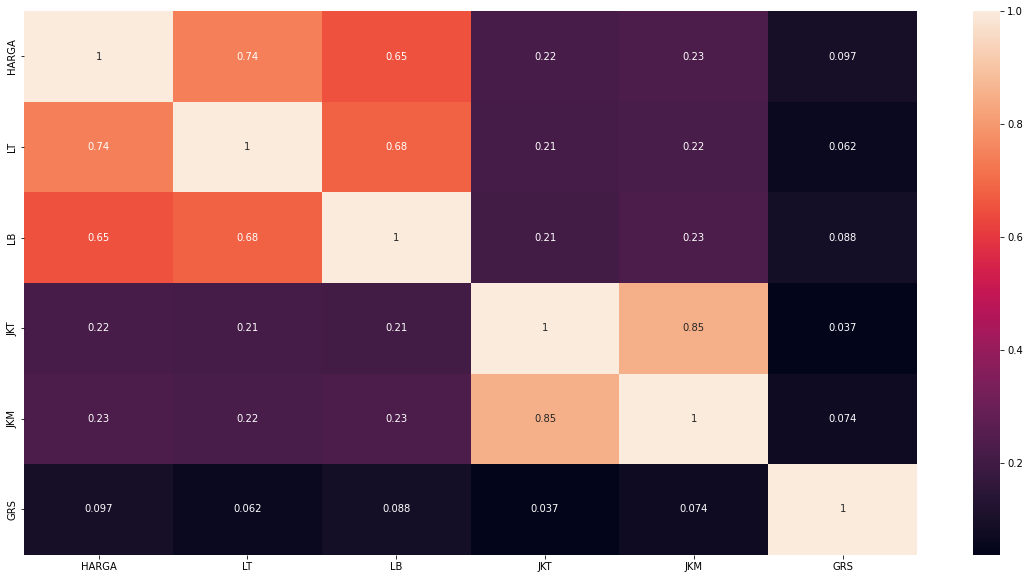

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(corelations,annot=True)

Korelasi dari sebuah GRS, JKM, JKT sangat buruk dalam penentuan harga sebuah rumah maka dikarenakan sebuah valuenya mendekati 0 maka dari itu akan di drop

In [159]:
df = df.drop(columns=['JKT','JKM','GRS'],axis=1)
df

,HARGA,LT,LB,KOTA
0,28000000000,1100,700,BADUNG
2,4700000000,500,400,BADUNG
3,4900000000,251,300,BADUNG
4,28000000000,1340,575,BADUNG
5,10000000000,460,300,BADUNG
...,...,...,...,...
996,16000000000,488,550,BADUNG
997,4500000000,209,270,BADUNG
998,29000000000,692,400,BADUNG
999,1700000000,102,140,BADUNG


In [160]:
# transform the kota data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(sparse='False',handle_unknown='ignore')
df['KOTA']=ohe.fit_transform(df['KOTA'].values.reshape(-1,1)).toarray()

In [161]:
df

,HARGA,LT,LB,KOTA
0,28000000000,1100,700,1.0
2,4700000000,500,400,1.0
3,4900000000,251,300,1.0
4,28000000000,1340,575,1.0
5,10000000000,460,300,1.0
...,...,...,...,...
996,16000000000,488,550,1.0
997,4500000000,209,270,1.0
998,29000000000,692,400,1.0
999,1700000000,102,140,1.0


<AxesSubplot:>

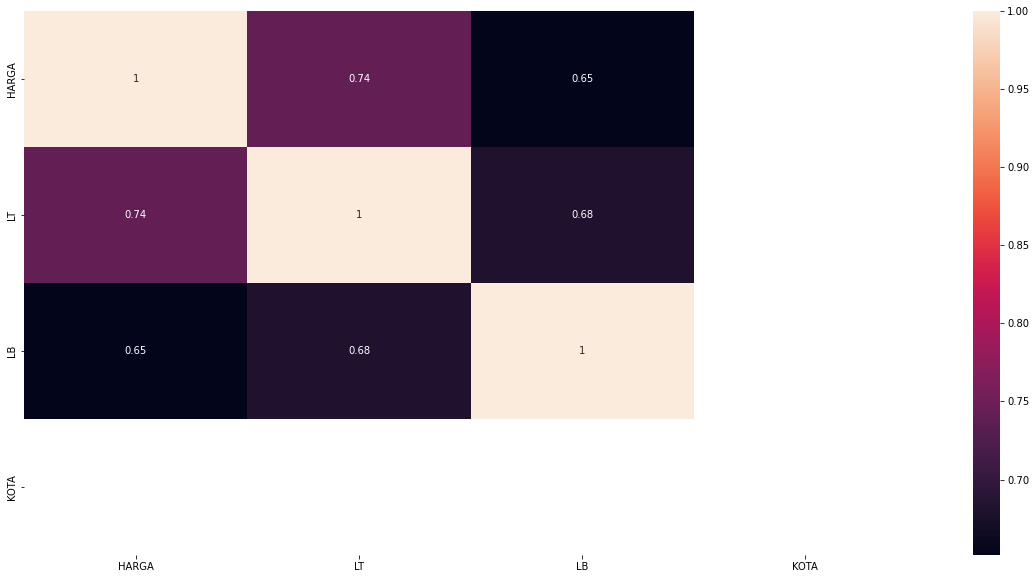

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [163]:
corelations =df.corr()
corelations['HARGA'].sort_values(ascending=False)

HARGA    1.000000
LT       0.740542
LB       0.651766
KOTA          NaN
Name: HARGA, dtype: float64

In [164]:
# omg its be slain too
df = df.drop(columns='KOTA',axis=1)
df

,HARGA,LT,LB
0,28000000000,1100,700
2,4700000000,500,400
3,4900000000,251,300
4,28000000000,1340,575
5,10000000000,460,300
...,...,...,...
996,16000000000,488,550
997,4500000000,209,270
998,29000000000,692,400
999,1700000000,102,140
